## Importing Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Modify Dataset for training

In [4]:
# #One hot is done on all object columns
# insurance_one_hot = pd.get_dummies(insurance)
# insurance_one_hot.head()

In [5]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [6]:
# Splitting into features and target
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
X.shape, y.shape

((1338, 6), (1338,))

In [9]:
# Split into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
# Fitting column transformer to training set

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [11]:
X_train

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [12]:
X_train.shape

(1070, 11)

## Building the Neural Model

In [13]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

2.14.0


In [14]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model
history = insurance_model.fit(X_train, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 2s 4ms/step - loss: 13344.0312 - mae: 13344.0312
Epoch 2/300
34/34 [==============================] - 0s 8ms/step - loss: 13338.0195 - mae: 13338.0195
Epoch 3/300
34/34 [==============================] - 0s 4ms/step - loss: 13322.9609 - mae: 13322.9609
Epoch 4/300
34/34 [==============================] - 0s 5ms/step - loss: 13289.6064 - mae: 13289.6064
Epoch 5/300
34/34 [==============================] - 0s 7ms/step - loss: 13226.5322 - mae: 13226.5322
Epoch 6/300
34/34 [==============================] - 0s 4ms/step - loss: 13122.0010 - mae: 13122.0010
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 12965.0322 - mae: 12965.0322
Epoch 8/300
34/34 [==============================] - 0s 4ms/step - loss: 12745.0303 - mae: 12745.0303
Epoch 9/300
34/34 [==============================] - 0s 4ms/step - loss: 12451.4697 - mae: 12451.4697
Epoch 10/300
34/34 [==============================] - 0s 7ms/step - loss: 12076.05

In [15]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.2903 - mae: 3161.2903


[3161.290283203125, 3161.290283203125]

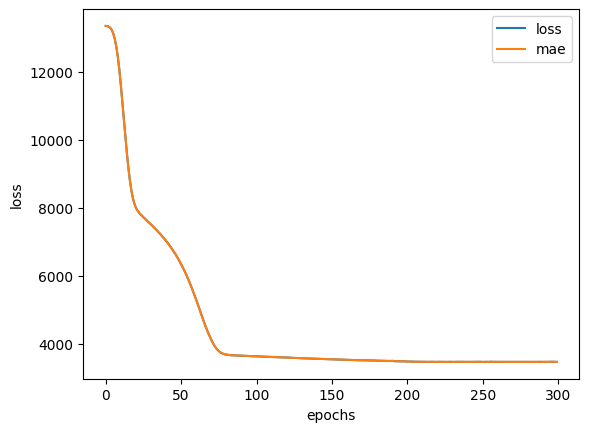

In [16]:
# Visualize no of epochs to the loss value

# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [25]:
y_pred = insurance_model.predict(X_test)
y_pred = tf.squeeze(y_pred)
y_pred = np.array(y_pred)

9/9 [==============================] - 0s 3ms/step


In [ ]:
# Assuming y_pred is a NumPy array or a Pandas Series
rounded_y_pred = y_pred.round(2)  # Round to 2 decimal places
rounded_y_test = y_test.round(2)

# Print the rounded predictions
for pred, actual in zip(rounded_y_pred, rounded_y_test):
    print(f'{str(pred)}  -  {str(actual)}')